In [1]:
import pandas as pd

In [2]:
df_qual_20 = pd.read_csv(
    '../data/euro20_qualifiers_norm.csv',
    index_col=0)

github = 'https://raw.githubusercontent.com/martj42' 
df_allmatches = pd.read_csv(
f'{github}/international_results/master/results.csv')

In [3]:
df_group_20 = df_allmatches[(df_allmatches.tournament=='UEFA Euro') & 
              (df_allmatches.date>='2021-06-11') & 
              (df_allmatches.date<='2021-06-23')]
df_group_20.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44010,2021-06-11,Italy,Turkey,3.0,0.0,UEFA Euro,Rome,Italy,False
44019,2021-06-12,Wales,Switzerland,1.0,1.0,UEFA Euro,Cardiff,Wales,False
44020,2021-06-12,Denmark,Finland,0.0,1.0,UEFA Euro,Copenhagen,Denmark,False
44021,2021-06-12,Russia,Belgium,0.0,3.0,UEFA Euro,Saint Petersburg,Russia,False
44025,2021-06-13,Austria,North Macedonia,3.0,1.0,UEFA Euro,Bucharest,Romania,True


In [4]:
group_20_teams = list(df_group_20.home_team.unique()) + list(df_group_20.away_team.unique())
# eliminate duplicates 
group_20_teams = list(set(group_20_teams))
print(group_20_teams[-1])
# how many teams?
len(group_20_teams)

Poland


24

In [5]:
df_qual_20_filter = df_qual_20[
    df_qual_20.team_name.isin(group_20_teams)]

qual_20_teams = df_qual_20_filter['team_name'].unique()
len(qual_20_teams)

22

In [6]:
set(group_20_teams) - set(qual_20_teams)

{'Czech Republic', 'Turkey'}

In [7]:
group_20_teams.extend(['Czechia', 'Türkiye'])
df_qual_20_filter = df_qual_20[
    (df_qual_20.team_name.isin(group_20_teams))]
df_qual_20_filter

,team_name,goals,attempts,attempts_on_target,attempts_off_target,attempts_blocked,matches_appearance,passes_accuracy,passes_attempted,passes_completed,...,clearance_attempted,saves,goals_conceded,own_goal_conceded,saves_on_penalty,clean_sheet,fouls_committed,fouls_suffered,yellow_cards,red_cards
0,Belgium,4.000000,20.700000,9.200,7.800000,3.700,1.0,89.00,711.500000,634.400000,...,10.600000,1.600000,0.300000,0.000000,0.000,0.700,11.000000,8.600000,0.600000,0.000000
1,Italy,3.700000,20.500000,8.100,7.500000,4.900,1.0,89.50,680.900000,609.900000,...,11.400000,2.100000,0.400000,0.000000,0.000,0.600,10.400000,10.600000,1.200000,0.000000
2,England,4.625000,13.750000,8.000,2.625000,3.125,1.0,89.00,684.750000,612.000000,...,12.375000,2.500000,0.750000,0.000000,0.000,0.625,10.250000,8.875000,1.125000,0.000000
3,Russia,3.300000,20.700000,7.600,8.700000,4.300,1.0,85.40,610.800000,524.000000,...,14.400000,1.400000,0.800000,0.000000,0.000,0.700,11.800000,8.900000,1.100000,0.100000
4,Spain,3.100000,22.700000,8.300,8.000000,6.400,1.0,90.80,788.800000,717.200000,...,12.600000,1.800000,0.500000,0.000000,0.000,0.500,8.600000,11.100000,1.800000,0.100000
5,Germany,3.750000,19.875000,8.500,7.125000,4.250,1.0,90.13,779.500000,707.000000,...,15.000000,2.500000,0.875000,0.125000,0.125,0.625,8.625000,8.375000,0.375000,0.125000
6,France,2.500000,16.900000,6.700,7.800000,2.400,1.0,89.50,736.800000,661.600000,...,9.900000,1.000000,0.600000,0.000000,0.000,0.500,11.200000,9.300000,1.400000,0.000000
7,Netherlands,3.000000,17.625000,7.375,6.125000,4.125,1.0,88.75,675.750000,600.125000,...,10.875000,1.375000,0.875000,0.000000,0.000,0.500,10.875000,9.375000,1.125000,0.000000
8,Sweden,2.300000,14.700000,6.300,4.600000,3.800,1.0,83.30,478.600000,406.100000,...,23.500000,2.500000,0.900000,0.000000,0.000,0.500,13.000000,12.200000,1.600000,0.000000
9,Denmark,2.875000,17.375000,6.250,7.250000,3.875,1.0,85.25,567.625000,486.875000,...,18.625000,1.750000,0.750000,0.000000,0.000,0.500,10.375000,10.875000,0.875000,0.000000


In [8]:
df_qual_20_filter.columns

Index(['team_name', 'goals', 'attempts', 'attempts_on_target',
       'attempts_off_target', 'attempts_blocked', 'matches_appearance',
       'passes_accuracy', 'passes_attempted', 'passes_completed',
       'ball_possession', 'cross_accuracy', 'cross_attempted',
       'cross_completed', 'free_kick', 'attacks', 'assists', 'corners',
       'offsides', 'recovered_ball', 'tackles', 'clearance_attempted', 'saves',
       'goals_conceded', 'own_goal_conceded', 'saves_on_penalty',
       'clean_sheet', 'fouls_committed', 'fouls_suffered', 'yellow_cards',
       'red_cards'],
      dtype='object')

In [9]:
sel_feats = ['goals', 'attempts', 'attempts_on_target', 'attempts_off_target',
             'passes_accuracy', 'passes_attempted',
             'ball_possession', 'cross_accuracy', 'cross_attempted', 
             'free_kick', 'attacks', 'assists', 'corners',
             'offsides', 'recovered_ball', 'tackles', 
             'clearance_attempted', 'saves',
             'goals_conceded', 'fouls_committed', 'fouls_suffered']


df_qual_20_filter[['team_name']+sel_feats]

,team_name,goals,attempts,attempts_on_target,attempts_off_target,passes_accuracy,passes_attempted,ball_possession,cross_accuracy,cross_attempted,...,assists,corners,offsides,recovered_ball,tackles,clearance_attempted,saves,goals_conceded,fouls_committed,fouls_suffered
0,Belgium,4.000000,20.700000,9.200,7.800000,89.00,711.500000,62.30,52.06,26.700000,...,3.300000,8.700,2.000000,37.500000,2.500000,10.600000,1.600000,0.300000,11.000000,8.600000
1,Italy,3.700000,20.500000,8.100,7.500000,89.50,680.900000,65.30,50.45,22.600000,...,2.700000,7.300,2.500000,34.000000,4.300000,11.400000,2.100000,0.400000,10.400000,10.600000
2,England,4.625000,13.750000,8.000,2.625000,89.00,684.750000,62.00,45.95,18.500000,...,3.375000,4.250,1.625000,33.000000,2.500000,12.375000,2.500000,0.750000,10.250000,8.875000
3,Russia,3.300000,20.700000,7.600,8.700000,85.40,610.800000,60.00,51.78,30.900000,...,2.300000,8.700,2.700000,39.200000,3.000000,14.400000,1.400000,0.800000,11.800000,8.900000
4,Spain,3.100000,22.700000,8.300,8.000000,90.80,788.800000,70.41,52.88,33.100000,...,2.600000,10.000,2.400000,34.000000,4.100000,12.600000,1.800000,0.500000,8.600000,11.100000
5,Germany,3.750000,19.875000,8.500,7.125000,90.13,779.500000,62.13,53.48,18.000000,...,3.250000,6.750,2.875000,34.625000,2.750000,15.000000,2.500000,0.875000,8.625000,8.375000
6,France,2.500000,16.900000,6.700,7.800000,89.50,736.800000,67.91,49.43,26.100000,...,2.100000,6.900,3.300000,33.900000,3.200000,9.900000,1.000000,0.600000,11.200000,9.300000
7,Netherlands,3.000000,17.625000,7.375,6.125000,88.75,675.750000,65.38,50.26,24.125000,...,2.625000,5.000,2.250000,37.250000,4.125000,10.875000,1.375000,0.875000,10.875000,9.375000
8,Sweden,2.300000,14.700000,6.300,4.600000,83.30,478.600000,51.10,47.20,21.400000,...,1.800000,5.700,1.800000,34.300000,2.300000,23.500000,2.500000,0.900000,13.000000,12.200000
9,Denmark,2.875000,17.375000,6.250,7.250000,85.25,567.625000,56.75,46.02,20.375000,...,1.875000,6.375,1.500000,36.375000,2.375000,18.625000,1.750000,0.750000,10.375000,10.875000


In [10]:
df_group_20.replace('Czech Republic', 'Czechia', inplace=True)
df_group_20.replace('Turkey', 'Türkiye', inplace=True)
df_group_20

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44010,2021-06-11,Italy,Türkiye,3.0,0.0,UEFA Euro,Rome,Italy,False
44019,2021-06-12,Wales,Switzerland,1.0,1.0,UEFA Euro,Cardiff,Wales,False
44020,2021-06-12,Denmark,Finland,0.0,1.0,UEFA Euro,Copenhagen,Denmark,False
44021,2021-06-12,Russia,Belgium,0.0,3.0,UEFA Euro,Saint Petersburg,Russia,False
44025,2021-06-13,Austria,North Macedonia,3.0,1.0,UEFA Euro,Bucharest,Romania,True
44026,2021-06-13,Netherlands,Ukraine,3.0,2.0,UEFA Euro,Amsterdam,Netherlands,False
44027,2021-06-13,England,Croatia,1.0,0.0,UEFA Euro,London,England,False
44031,2021-06-14,Scotland,Czechia,0.0,2.0,UEFA Euro,Glasgow,Scotland,False
44032,2021-06-14,Poland,Slovakia,1.0,2.0,UEFA Euro,Saint Petersburg,Russia,True
44033,2021-06-14,Spain,Sweden,0.0,0.0,UEFA Euro,Seville,Spain,False


In [11]:
# create dataset 
# home, away, stats_home, stats_away, result (H, D, A)

all_stats = []

# loop on the df_group_20
for idx, row in df_group_20.iterrows():
    
    match_stats = []
    home_team = row['home_team']
    away_team = row['away_team']
    
    home_stats = \
    df_qual_20_filter[df_qual_20_filter['team_name']==home_team
                     ].copy()
    away_stats = \
    df_qual_20_filter[df_qual_20_filter['team_name']==away_team
                     ].copy()
    
    # calculate the result
    if row['home_score'] > row['away_score']:
        result = '1'
    elif row['home_score'] < row['away_score']:
        result = '2'
    else:
        result = 'X'
        
    # calculate the goals scored
    tot_goals = row['home_score'] + row['away_score']
    
    home_stats = home_stats.add_suffix('_home')
    away_stats = away_stats.add_suffix('_away')
    
    
    match_stats.extend(home_stats.values[0])
    match_stats.extend(away_stats.values[0])
    match_stats.append(result)
    match_stats.append(tot_goals)
    
    all_stats.append(match_stats)


print(all_stats[0])

['Italy', 3.7, 20.5, 8.1, 7.5, 4.9, 1.0, 89.5, 680.9, 609.9, 65.3, 50.45, 22.6, 11.4, 12.6, 40.8, 2.7, 7.3, 2.5, 34.0, 4.3, 11.4, 2.1, 0.4, 0.0, 0.0, 0.6, 10.4, 10.6, 1.2, 0.0, 'Türkiye', 1.8, 13.5, 5.1, 5.8, 2.6, 1.0, 84.9, 542.5, 466.2, 59.0, 50.78, 19.3, 9.8, 18.1, 34.6, 1.3, 4.2, 2.4, 32.4, 4.5, 17.2, 2.3, 0.3, 0.0, 0.0, 0.8, 13.3, 15.5, 2.3, 0.0, '1', 3.0]


In [12]:
columns = list(home_stats.columns) + list(away_stats.columns) + ['result', 'tot_goals'] 
df_matches_stats = pd.DataFrame(all_stats, columns=columns)


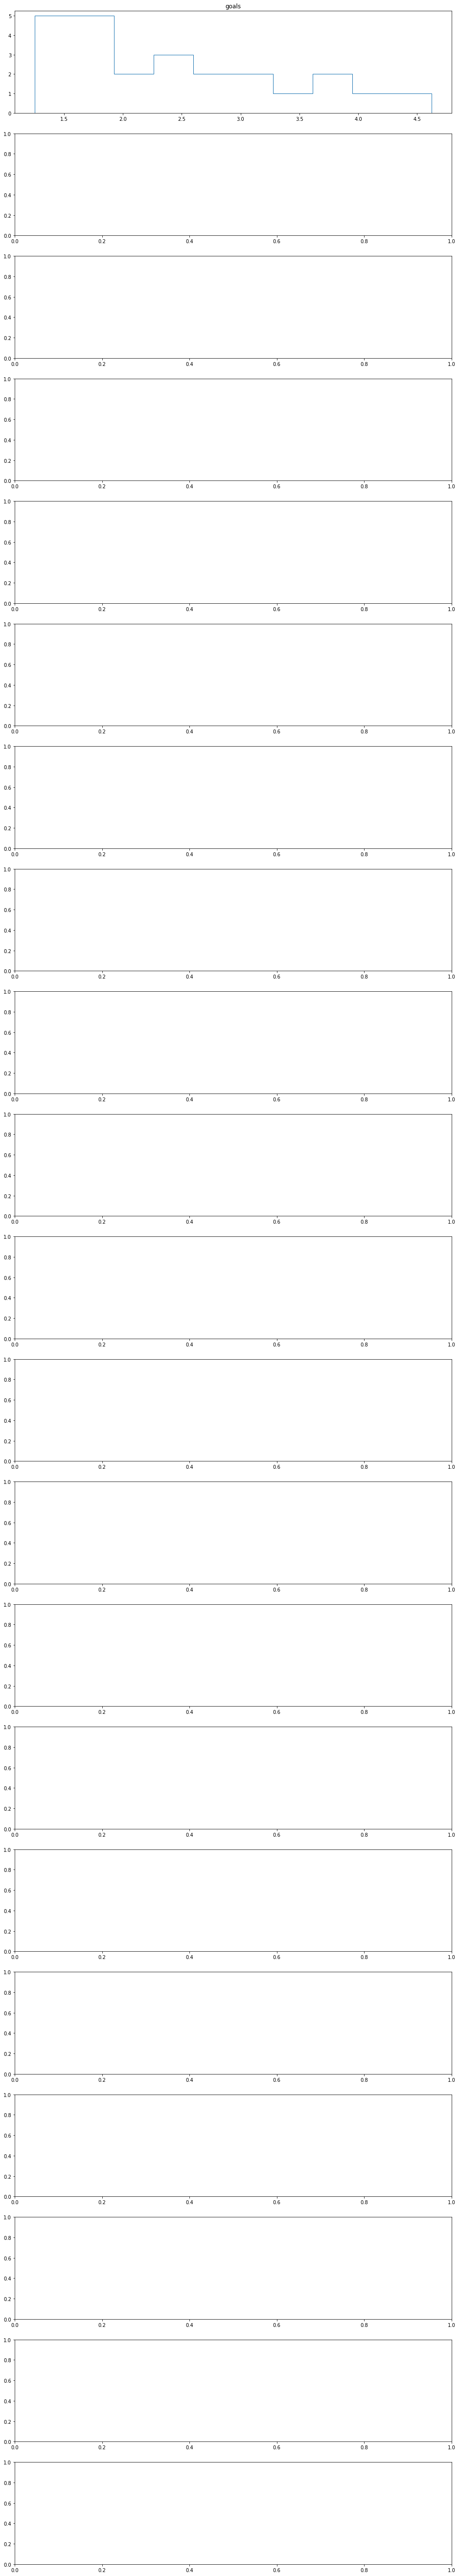

In [13]:
# look at the features
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(sel_feats), figsize=(16, 96))

for idx, feat in enumerate(sel_feats):
    metric = df_qual_20_filter[feat]
    ax[idx].hist(metric, histtype='step')
    ax[idx].set_title(feat)
    

    plt.show()

In [14]:
df_group_20['matchday'] = 0
df_group_20['matchday'][0:12] = 1
df_group_20['matchday'][12:24] = 2
df_group_20['matchday'][24:36] = 3

df_group_20['tot_goals'] = \
df_group_20['away_score'] + \
df_group_20['home_score']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

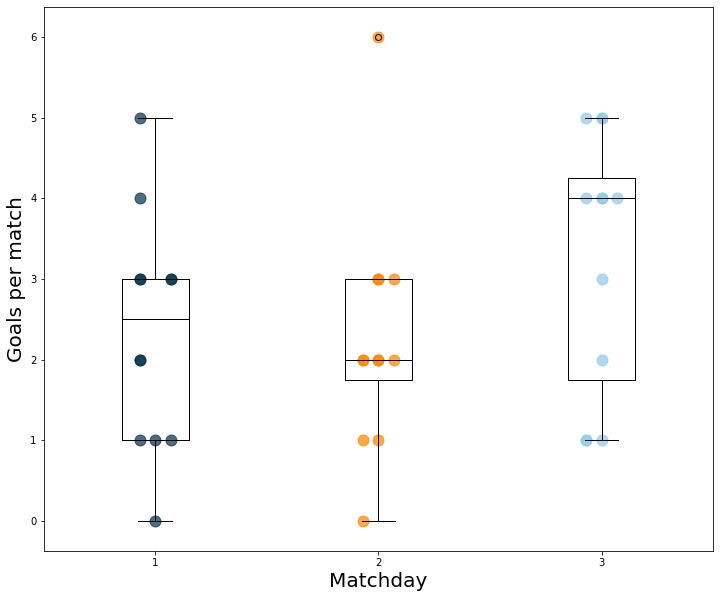

In [15]:
import random

fig, ax = plt.subplots(figsize=(12,10))

ax.set_ylabel('Goals per match', fontsize=20)
ax.set_xlabel('Matchday', fontsize=20)

goals_match = [
df_group_20[df_group_20['matchday']==1]
    ['tot_goals'],
df_group_20[df_group_20['matchday']==2]
    ['tot_goals'],
df_group_20[df_group_20['matchday']==3]
    ['tot_goals']
]

labels = ['Matchday 1', 'Matchday 2', 'Matchday 3']
colors = ['#023047', '#fb8500', '#8ecae6']

bplot = ax.boxplot(goals_match,
                   medianprops = {'color': 'black'}
                   # patch_artist=True
                  )

for i in range(3):
    data = \
    df_group_20[
        df_group_20['matchday']==(i+1)]
    m = [m + 0.07*random.randint(-1, 1) for m in data.matchday]
    tot_goals = data.tot_goals
    ax.scatter(m, tot_goals, 
               color=colors[i], 
               alpha=0.7,
               s=120)
    
plt.show()

In [16]:
df_group_20_m1 = df_group_20[df_group_20['matchday']==1]
df_group_20_m2 = df_group_20[df_group_20['matchday']==2]
df_group_20_m3 = df_group_20[df_group_20['matchday']==3]

print(f"Max goals in Matchday 1: {df_group_20_m1['tot_goals'].max():.2f}")
print(f"Max goals in Matchday 2: {df_group_20_m2['tot_goals'].max():.2f}")
print(f"Max goals in Matchday 3: {df_group_20_m3['tot_goals'].max():.2f}")

print(f"Avg goals in Matchday 1: {df_group_20_m1['tot_goals'].mean():.2f}")
print(f"Avg goals in Matchday 2: {df_group_20_m2['tot_goals'].mean():.2f}")
print(f"Avg goals in Matchday 3: {df_group_20_m3['tot_goals'].mean():.2f}")

print(f"Min goals in Matchday 1: {df_group_20_m1['tot_goals'].min():.2f}")
print(f"Min goals in Matchday 2: {df_group_20_m2['tot_goals'].min():.2f}")
print(f"Min goals in Matchday 3: {df_group_20_m3['tot_goals'].min():.2f}")

Max goals in Matchday 1: 5.00
Max goals in Matchday 2: 6.00
Max goals in Matchday 3: 5.00
Avg goals in Matchday 1: 2.33
Avg goals in Matchday 2: 2.25
Avg goals in Matchday 3: 3.25
Min goals in Matchday 1: 0.00
Min goals in Matchday 2: 0.00
Min goals in Matchday 3: 1.00


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import \
LogisticRegression
from sklearn.neighbors import \
KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# split data in train and test
data_train, data_test = train_test_split(df_matches_stats, 
                                         test_size=0.4, 
                                         random_state=0)
X = data_train.drop(labels=['team_name_home', 'team_name_away', 'result', 'tot_goals'],
             axis=1)
Y = data_train['result']

# encode the target
# 1->1, 2->2, X->0
Y_enc = Y.apply(lambda x: 0 if x=='X' else int(x))

# train the models
models = [DecisionTreeClassifier(random_state=0), 
          LogisticRegression(random_state=0), 
          KNeighborsClassifier(n_neighbors=3), 
          RandomForestClassifier(max_depth=4, 
                                 random_state=0)]

for clf in models:
    print(clf)
    print(cross_val_score(clf, X, Y_enc, cv=4).mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
0.4541666666666666
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.6166666666666667
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
0.525
RandomForestClassifier(bootstrap=True, class_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [18]:
clf = RandomForestClassifier(max_depth=4,
                             random_state=42)
clf.fit(X, Y_enc)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
import numpy as np

# test the prediction
X_test = data_test.drop(labels=['team_name_home', 'team_name_away', 'result', 'tot_goals'],
             axis=1)
Y_test = data_test['result']

# encode the target
# 1->1, 2->2, X->0
Y_test_enc = Y_test.apply(lambda x: 0 if x=='X' else int(x))

pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)

# decode back
data_test['pred'] = ['X' if x==0 else str(x) for x in pred]
# add probabilities
data_test['pred_proba_X'] = 0
data_test['pred_proba_1'] = 0
data_test['pred_proba_2'] = 0

data_test[['pred_proba_X', 
           'pred_proba_1',
           'pred_proba_2']] = pred_proba

# print the predictions
count_correct = 0
print("| Match | Prediction | Result | Outcome |")
print("| ----- | ---------- | ------ | ------- |")

for idx, row in data_test.iterrows():
    outcome = "Lost"
    match = f"""{row['team_name_home']}-
    {row['team_name_away']}"""
    if row['pred'] == row['result']:
        count_correct += 1
        outcome = "Won"
    print(f"| {match} | {row['pred']} | {row['result']} | {outcome} |")
    
    
    print(f"""Probability 1: 
    {100*row['pred_proba_1']:.2f}%""")
    print(f"""Probability X: 
    {100*row['pred_proba_X']:.2f}%""")
    print(f"""Probability 2: 
    {100*row['pred_proba_2']:.2f}%""")
    print("======================")


# clean up
data_test.drop(['pred', 
                'pred_proba_X', 
                'pred_proba_1', 
                'pred_proba_2'], axis=1, inplace=True)

# show the results
print(f"Total matches: {len(data_test)}")
print(f"Correctly predicted: {count_correct/len(data_test)}")

| Match | Prediction | Result | Outcome |
| ----- | ---------- | ------ | ------- |
| England-
    Czechia | X | 1 | Lost |
Probability 1: 
    30.00%
Probability X: 
    60.00%
Probability 2: 
    10.00%
| Sweden-
    Slovakia | 1 | 1 | Won |
Probability 1: 
    40.00%
Probability X: 
    20.00%
Probability 2: 
    40.00%
| Ukraine-
    North Macedonia | X | 1 | Lost |
Probability 1: 
    30.00%
Probability X: 
    40.00%
Probability 2: 
    30.00%
| Scotland-
    Croatia | 2 | 2 | Won |
Probability 1: 
    30.00%
Probability X: 
    10.00%
Probability 2: 
    60.00%
| Hungary-
    France | 2 | X | Lost |
Probability 1: 
    20.00%
Probability X: 
    20.00%
Probability 2: 
    60.00%
| Denmark-
    Belgium | 2 | 2 | Won |
Probability 1: 
    30.00%
Probability X: 
    0.00%
Probability 2: 
    70.00%
| Hungary-
    Portugal | 2 | 2 | Won |
Probability 1: 
    20.00%
Probability X: 
    20.00%
Probability 2: 
    60.00%
| Denmark-
    Finland | 1 | 2 | Lost |
Probability 1: 
    50.00

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for 

In [20]:
# predict goals
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split

# split data in train and test
data_train, data_test = train_test_split(df_matches_stats, 
                                         test_size=0.4, 
                                         random_state=0)
X = data_train.drop(
    labels=['team_name_home', 'team_name_away', 
            'result', 'tot_goals'],
             axis=1)
Y = data_train['tot_goals']

# train the models
models = [DecisionTreeRegressor(random_state=0), 
          LinearRegression(fit_intercept=True), 
          KNeighborsRegressor(n_neighbors=2), 
          RandomForestRegressor(max_depth=5, 
                                 random_state=0)]

for reg in models:
    reg.fit(X, Y)
    r_sq = reg.score(X, Y)
    print(reg)
    print(r_sq)    

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')
1.0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
1.0
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')
0.4806654676258993
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [21]:
reg = RandomForestRegressor(
    max_depth=5, 
    random_state=0)
reg.fit(X, Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [22]:
# test the prediction
X_test = data_test.drop(labels=['team_name_home', 
                                'team_name_away', 
                                'result', 
                                'tot_goals'],
             axis=1)

Y_test = data_test['tot_goals']

# check if over 2.5
pred = reg.predict(X_test)

over_yes = 0
over_right = 0

print("| Match | Prediction | Total Goals | Outcome |")
print("| ----- | ---------- | ----------- | ------- |")

for p_res, a_res, home, away in zip(pred, 
                        Y_test, 
                        data_test['team_name_home'],
                        data_test['team_name_away']):
    
    outcome = "Lost"
    if p_res > 2.5 and a_res > 2.5:
        # got the over2.5 correct 
        over_right += 1
        outcome = "Won"
    if p_res > 2.5:
        # we predicted an over
        over_yes += 1
        match = f"{home}-{away}"
        print(f"| {match} | Over | {a_res} | {outcome}")
        
        
print(f"Over 2.5 predicted: {100*over_right/over_yes:.2f}%")

| Match | Prediction | Total Goals | Outcome |
| ----- | ---------- | ----------- | ------- |
| Sweden-Slovakia | Over | 1.0 | Lost
| Ukraine-North Macedonia | Over | 3.0 | Won
| Scotland-Croatia | Over | 4.0 | Won
| Hungary-France | Over | 2.0 | Lost
| Denmark-Belgium | Over | 3.0 | Won
| Germany-France | Over | 1.0 | Lost
| Finland-Belgium | Over | 2.0 | Lost
| Netherlands-North Macedonia | Over | 3.0 | Won
Over 2.5 predicted: 50.00%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [23]:
import joblib

# Save models
filename_results = "../data/euro20_results.joblib"
filename_goals = "../data/euro20_goals.joblib"

joblib.dump(clf, filename_results)
joblib.dump(reg, filename_goals)

['../data/euro20_goals.joblib']